## SETUP

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## DATA INGESTION

In [3]:
df = pd.read_csv("data/raw/UCI_Credit_Card.csv")

## starting EDA

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df['ID'].unique()

array([    1,     2,     3, ..., 29998, 29999, 30000], dtype=int64)

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

### replacing the numeric entry values with actual 

In [10]:
#df['SEX'] = df['SEX'].replace('1', 'M')   #does not work 
change = {'1':'M', '2':'F'}
df['SEX'] = df['SEX'].astype(str).replace(change)  #have to change it to string type for it to accept this cmd

#df['SEX'] = df['SEX'].replace({1: 'm', 2: 'f'})  #directly works, no need to change type
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
df['EDUCATION'] = df['EDUCATION'].replace({6:5})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [12]:
df['MARRIAGE'] = df['MARRIAGE'].astype(str).replace({'1':'married', '2':'single', '3':'others'})
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
#new = {'-1':'duly', '0':'not known','1':'delay 1m', '2':'delay 2m', '3':'delay 3m', '4':'delay 4m', '5':'delay 5m', '6':'delay 6m', '7':'delay 7m', '8':'delay 8m', '9':'delay=>9m'}
#cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6']
#df[cols] = df[cols].astype(str).replace(new)
#df

### renaming the attributes

In [14]:
df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG', 'PAY_3':'REPAY_JUL', 'PAY_4':'REPAY_JUN', 'PAY_5':'REPAY_MAY', 'PAY_6':'REPAY_APR' }, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [15]:
df.rename(columns={'BILL_AMT1':'BILL_SEPT', 'BILL_AMT2':'BILL_AUG', 'BILL_AMT3':'BILL_JUL', 'BILL_AMT4':'BILL_JUN', 'BILL_AMT5':'BILL_MAY', 'BILL_AMT6':'BILL_APR'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [16]:
df.rename(columns={'PAY_AMT1':'PAID_SEPT', 'PAY_AMT2':'PAID_AUG', 'PAY_AMT3':'PAID_JUL', 'PAY_AMT4':'PAID_JUN', 'PAY_AMT5':'PAID_MAY', 'PAY_AMT6':'PAID_APR'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### finding correlation

In [17]:
#data = {'LIMIT_BAL', 'BILL_SEPT', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY','BILL_APR', 'PAID_SEPT', 'PAID_AUG', 'PAID_JUL', 'PAID_JUN', 'PAID_MAY', 'PAID_APR'}
#dn = pd.DataFrame(data)
#dn.corr()
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                       int64
MARRIAGE                       object
AGE                             int64
REPAY_SEPT                      int64
REPAY_AUG                       int64
REPAY_JUL                       int64
REPAY_JUN                       int64
REPAY_MAY                       int64
REPAY_APR                       int64
BILL_SEPT                     float64
BILL_AUG                      float64
BILL_JUL                      float64
BILL_JUN                      float64
BILL_MAY                      float64
BILL_APR                      float64
PAID_SEPT                     float64
PAID_AUG                      float64
PAID_JUL                      float64
PAID_JUN                      float64
PAID_MAY                      float64
PAID_APR                      float64
default.payment.next.month      int64
dtype: object

In [18]:
#data = ['LIMIT_BAL', 'BILL_SEPT', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY','BILL_APR', 'PAID_SEPT', 'PAID_AUG', 'PAID_JUL', 'PAID_JUN', 'PAID_MAY', 'PAID_APR']
#subset_df = df[data]
#selected_float_columns = subset_df.select_dtypes(include='float')
#correlation_matrix = selected_float_columns.corr()

selected_float_columns = df.select_dtypes(include='float')
correlation_matrix = selected_float_columns.corr()
correlation_matrix



,LIMIT_BAL,BILL_SEPT,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
LIMIT_BAL,1.000000,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
BILL_SEPT,0.285430,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AUG,0.278314,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_JUL,0.283236,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_JUN,0.293988,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_MAY,0.295562,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_APR,0.290389,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAID_SEPT,0.195236,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAID_AUG,0.178408,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAID_JUL,0.210167,0.156887,0.150718,0.130011,0.300023,0.252305,0.233770,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740


In [19]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,2,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## EDA WITH THE REPAYMENT COLS

In [20]:
cols_sum = ['REPAY_SEPT', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APR']
df['Column_Sum'] = df[cols_sum].sum(axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_MAY,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3
2,3,90000.0,F,2,single,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,F,2,married,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-4
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,8
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-1


In [21]:
cols_sum = ['REPAY_SEPT', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY', 'REPAY_APR']
df['Repay_mean'] = df[cols_sum].mean(axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,-0.333333
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,0.500000
2,3,90000.0,F,2,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.000000
3,4,50000.0,F,2,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.000000
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0.000000
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-4,-0.666667
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,8,1.333333
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-1,-0.166667


<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

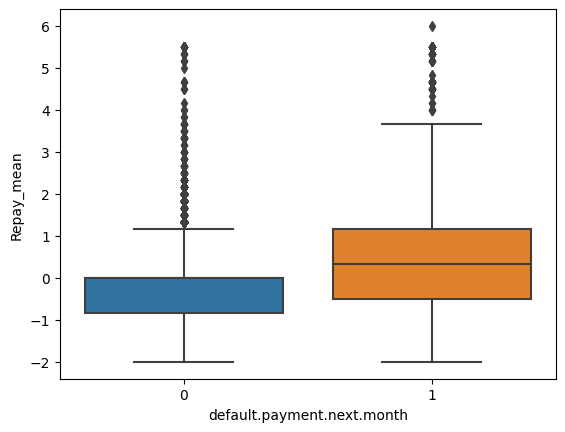

In [22]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean)

<Axes: xlabel='default.payment.next.month', ylabel='Column_Sum'>

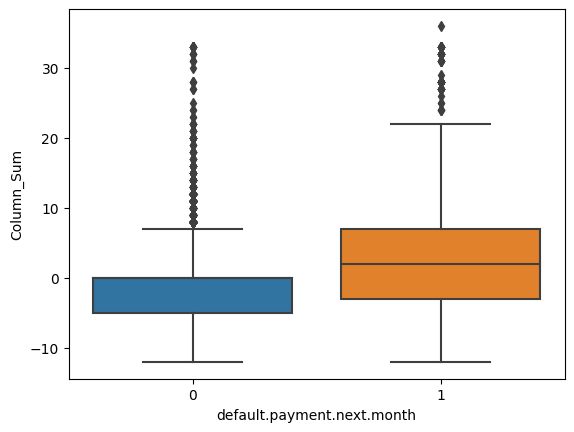

In [23]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Column_Sum)

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

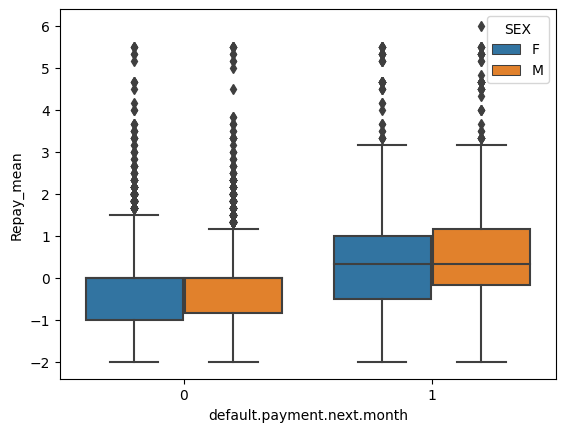

In [24]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean, hue= df.SEX)

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

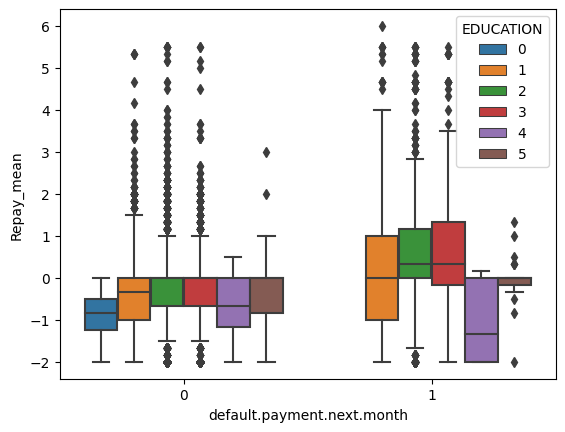

In [25]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean, hue= df.EDUCATION)

<Axes: xlabel='default.payment.next.month', ylabel='Repay_mean'>

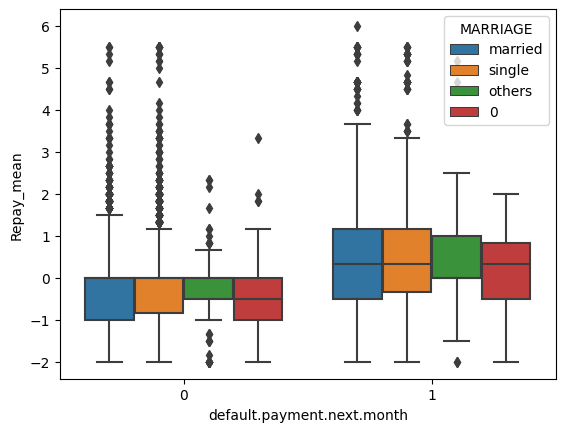

In [26]:
sns.boxplot(x = df['default.payment.next.month'], y = df.Repay_mean, hue= df.MARRIAGE)

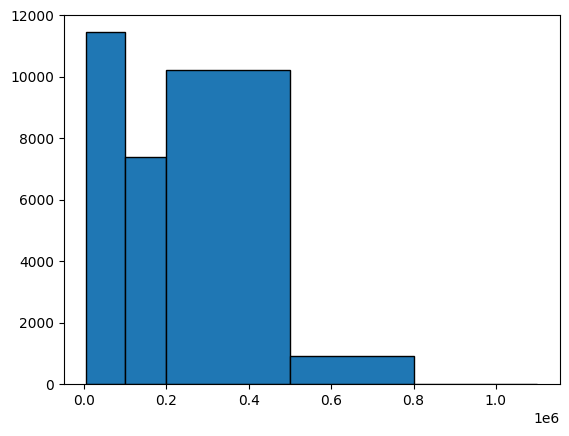

In [27]:
values = [df.LIMIT_BAL]
bins = [5000, 100000, 200000, 500000, 800000, 1100000]
plt.hist(values, bins, edgecolor = 'black')
plt.show()

In [28]:
minNo = 30
filter_df = df[df['Column_Sum']>=minNo] 
filter_df   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
649,650,20000.0,F,2,single,46,8,7,6,5,...,18148.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33,5.500000
673,674,30000.0,M,2,single,25,2,2,7,7,...,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,1,31,5.166667
749,750,50000.0,F,2,single,25,8,7,6,5,...,34365.0,0.0,0.0,1000.0,0.0,0.0,3000.0,1,33,5.500000
831,832,20000.0,F,3,married,24,8,7,6,5,...,21162.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33,5.500000
862,863,30000.0,F,3,single,52,2,2,7,7,...,2450.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32,5.333333
981,982,30000.0,M,2,single,29,8,7,6,5,...,30558.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33,5.500000
1146,1147,70000.0,F,1,single,31,2,2,7,7,...,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32,5.333333
1249,1250,350000.0,F,1,married,52,2,2,7,7,...,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32,5.333333
1485,1486,20000.0,F,2,others,44,2,2,7,7,...,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,1,31,5.166667
1894,1895,100000.0,M,2,single,30,1,3,7,6,...,103522.0,20000.0,0.0,10000.0,10000.0,0.0,0.0,1,32,5.333333


In [29]:
minNo2 = 20
filter_df1 = df[(df['Column_Sum']>=minNo2)&(df['Column_Sum']<minNo)] 
filter_df1   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
158,159,210000.0,M,3,married,45,2,3,4,4,...,154105.0,10478.0,10478.0,11078.0,11078.0,11678.0,10478.0,1,24,4.000000
943,944,80000.0,F,2,single,24,2,2,5,5,...,300.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,3.500000
1132,1133,270000.0,M,1,married,44,3,3,4,4,...,278436.0,17944.0,18112.0,15405.0,10000.0,0.0,0.0,0,22,3.666667
1372,1373,270000.0,F,1,married,42,2,2,5,5,...,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21,3.500000
1521,1522,60000.0,M,2,single,40,3,3,5,4,...,10055.0,1500.0,0.0,0.0,0.0,500.0,0.0,0,20,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,29580,20000.0,M,2,single,36,3,2,2,7,...,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,1,28,4.666667
29668,29669,70000.0,M,2,married,42,4,4,4,4,...,65706.0,2272.0,3614.0,3100.0,2500.0,3100.0,1000.0,1,24,4.000000
29726,29727,60000.0,M,2,married,36,3,2,2,7,...,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27,4.500000
29744,29745,30000.0,M,2,single,38,4,3,4,4,...,19392.0,3000.0,1000.0,786.0,0.0,0.0,0.0,1,22,3.666667


In [30]:
minNo3 = 10
filter_df2 = df[(df['Column_Sum']>=minNo3)&(df['Column_Sum']<minNo2)] 
filter_df2 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
58,59,200000.0,F,1,single,34,-1,3,2,2,...,1414.0,0.0,0.0,700.0,0.0,1200.0,0.0,0,10,1.666667
62,63,50000.0,M,1,single,29,2,2,2,2,...,28264.0,0.0,2700.0,0.0,2225.0,1200.0,0.0,1,12,2.000000
71,72,320000.0,M,2,single,29,2,2,2,2,...,63526.0,2500.0,2500.0,0.0,4800.0,2400.0,1600.0,1,12,2.000000
90,91,200000.0,M,1,married,53,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,12,2.000000
104,105,60000.0,F,2,single,26,2,2,2,2,...,55305.0,0.0,5000.0,2511.0,6.0,3000.0,3000.0,0,10,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29848,29849,100000.0,M,2,single,44,2,2,2,2,...,87461.0,2900.0,5000.0,3000.0,0.0,6200.0,4000.0,1,12,2.000000
29896,29897,70000.0,M,3,married,45,2,2,2,2,...,68957.0,3100.0,3008.0,0.0,5100.0,2600.0,0.0,1,12,2.000000
29976,29977,40000.0,M,2,single,47,2,2,3,2,...,46934.0,4000.0,0.0,2000.0,0.0,3520.0,0.0,1,13,2.166667
29991,29992,210000.0,M,2,married,34,3,2,2,2,...,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13,2.166667


In [31]:
minNo4 = 0
filter_df3 = df[(df['Column_Sum']>=minNo4)&(df['Column_Sum']<minNo3)] 
filter_df3 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,0.500000
2,3,90000.0,F,2,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.000000
3,4,50000.0,F,2,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.000000
5,6,50000.0,M,1,single,37,0,0,0,0,...,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0,0.000000
6,7,500000.0,M,1,single,29,0,0,0,0,...,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,29989,250000.0,M,1,married,34,0,0,0,0,...,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0,0,0.000000
29990,29991,140000.0,M,2,married,41,0,0,0,0,...,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0,0,0.000000
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0.000000
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,8,1.333333


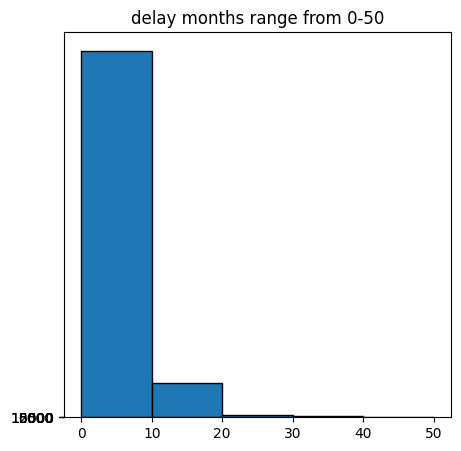

In [32]:
plt.figure(figsize=(5,5))
bins = [0,10,20,30,40,50]
plt.yticks([0,1,2,3, 4, 5], ['500', '2500', '5000', '10000', '15000', '16000'])
plt.hist(df.Column_Sum, bins, edgecolor = 'black')
plt.title('delay months range from 0-50')
plt.show()


## Prob of default with demographics 

### Default based on age

<Axes: xlabel='default.payment.next.month', ylabel='AGE'>

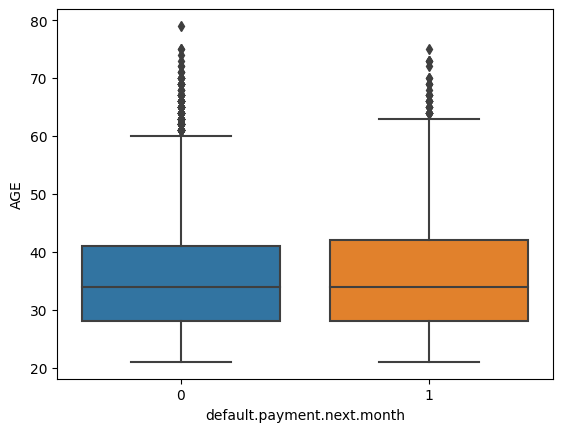

In [33]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['AGE'], orient='v')

### default based on age and sex

<Axes: xlabel='default.payment.next.month', ylabel='AGE'>

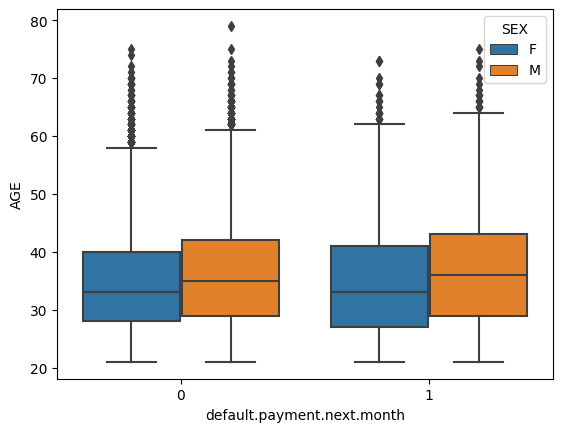

In [34]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['AGE'], orient='v', hue = df['SEX'])

<Axes: xlabel='default.payment.next.month', ylabel='AGE'>

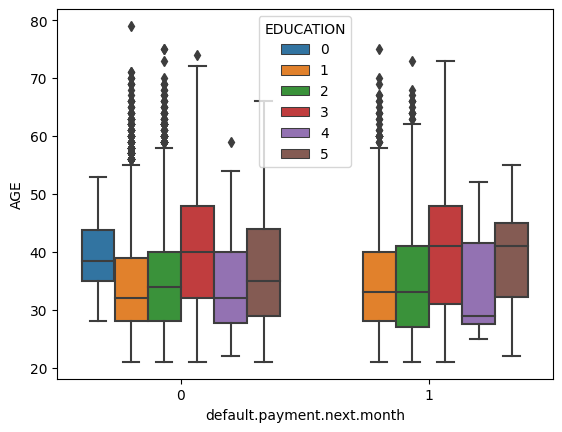

In [35]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['AGE'], orient='v', hue = df['EDUCATION'])

<Axes: xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

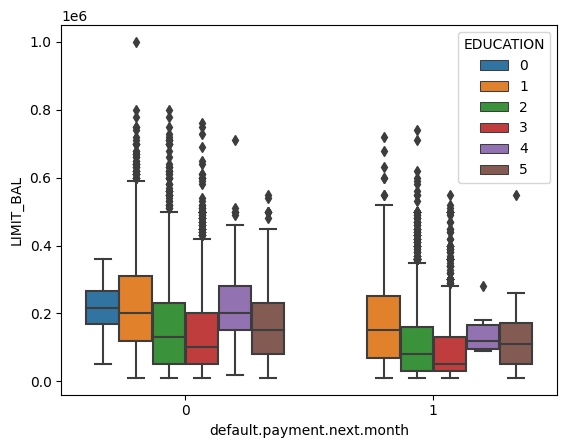

In [36]:
sns.boxplot(data=df, x = df['default.payment.next.month'], y = df['LIMIT_BAL'], orient='v', hue = df['EDUCATION'])

In [37]:
zero = df[df['EDUCATION']==0]
zero

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
3769,3770,290000.0,F,0,single,38,1,-1,-1,-1,...,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0,-4,-0.666667
5945,5946,270000.0,M,0,single,39,1,-1,-1,-1,...,0.0,10193.0,70213.0,19008.0,399.0,0.0,0.0,0,-5,-0.833333
6876,6877,360000.0,M,0,single,30,0,0,-1,0,...,30.0,23000.0,12280.0,25007.0,25008.0,1767.0,3300.0,0,-2,-0.333333
14631,14632,350000.0,F,0,single,53,-1,-1,-1,-1,...,6043.0,4840.0,61349.0,22687.0,1389.0,6058.0,1153.0,0,-6,-1.000000
15107,15108,210000.0,M,0,single,45,-2,-2,-2,-2,...,3372.0,5854.0,1032.0,788.0,3565.0,3372.0,15381.0,0,-12,-2.000000
16881,16882,100000.0,M,0,single,37,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-8,-1.333333
16896,16897,200000.0,M,0,single,40,1,-2,-1,-1,...,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,0,-6,-1.000000
17414,17415,230000.0,F,0,single,47,-1,-1,-1,2,...,4838.0,5743.0,1598.0,0.0,5425.0,4838.0,3840.0,0,-3,-0.500000
19920,19921,50000.0,F,0,married,40,0,0,0,0,...,41921.0,2229.0,2298.0,2100.0,2500.0,1921.0,8432.0,0,0,0.000000
20030,20031,200000.0,F,0,single,30,-1,-1,2,-1,...,7809.0,2880.0,0.0,9470.0,5834.0,7809.0,2886.0,0,-3,-0.500000


In [38]:
men = df[df['SEX']=='M']
print("total men in data: ",men.shape[0])

women = df[df['SEX']=='F']
print("total women in data: ", women.shape[0])

diff = women.shape[0]-men.shape[0]
percentage = (diff/men.shape[0])*100
percentage

total men in data:  11888
total women in data:  18112


52.35531628532974

## default based on sex

### women

In [39]:
#finding total number of women defaulted
filter1 = df[(df['default.payment.next.month'] == 1) & (df.SEX=='F')]
print(filter1.shape[0])

percent_F_def = (filter1.shape[0]/women.shape[0])*100
print(percent_F_def)

3763
20.776280918727917


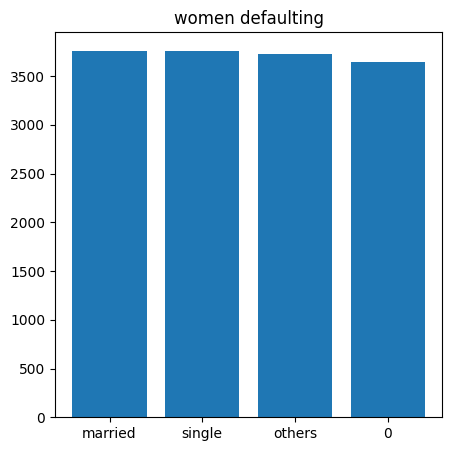

In [40]:
plt.figure(figsize=(5,5))
data = filter1['MARRIAGE']
#labels = ['single', 'married', 'others']

x_pos = range(len(data))

plt.bar(data, x_pos)

plt.title('women defaulting')

plt.show()

#### married

In [41]:
#no of married women among total women defaluters
mfilter1 = filter1[filter1.MARRIAGE=='married']
mfilter1.shape[0]

1860

In [42]:
#finding education of married women defaulters
mfilter1i = mfilter1[(mfilter1.EDUCATION== 1) | (mfilter1.EDUCATION== 3)]  
a = mfilter1i.shape[0]
print("school graduates or in high school: ", a)

mfilter1i1=mfilter1[(mfilter1.EDUCATION ==1)]
a1 = mfilter1i1.shape[0]
print("school graduates ",a1)

mfilter1i2=mfilter1[(mfilter1.EDUCATION ==3)]
a2 = mfilter1i2.shape[0]
print("high school ",a2)

mfilter1ii = mfilter1[mfilter1.EDUCATION== 2]  
b = mfilter1ii.shape[0]
print("in university: ", b)

mfilter1iii = mfilter1[mfilter1.EDUCATION== 4]  
c = mfilter1iii.shape[0]
print("others: ", c)

mfilter1iv = mfilter1[mfilter1.EDUCATION== 5]  
d = mfilter1iv.shape[0]
print("unknown: ", d)

school graduates or in high school:  830
school graduates  379
high school  451
in university:  1023
others:  1
unknown:  6


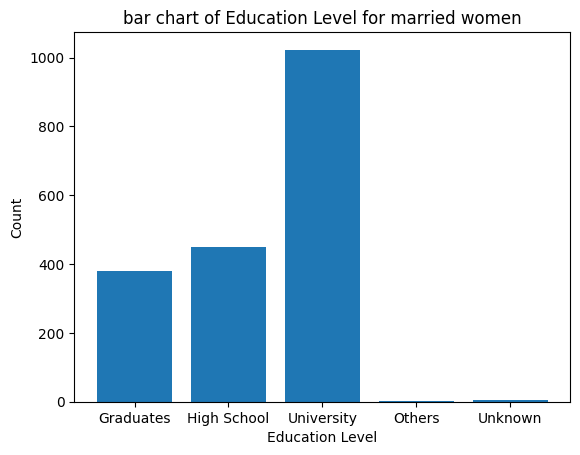

In [43]:
labels = ['Graduates', 'High School', 'University', 'Others', 'Unknown']

sizes = [a1, a2, b, c, d]

plt.bar(labels, sizes)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('bar chart of Education Level for married women')

plt.show()

#### single

In [44]:
#total single women defaulters 
mfilter1a = filter1[filter1.MARRIAGE=='single']
mfilter1a.shape[0]

1856

In [45]:
#education of single women defaulters
mfilter1ai = mfilter1a[(mfilter1a.EDUCATION== 1) | (mfilter1a.EDUCATION== 3)]  ##they are school graduates or in high school
aa = mfilter1ai.shape[0]
print("school graduates or in high school: ", aa)

new = mfilter1ai[mfilter1ai.EDUCATION== 1] #school graduates
aa1 = new.shape[0]
print("school graduates", new.shape[0])

new1 = mfilter1ai[mfilter1ai.EDUCATION== 3] #high school
aa2 = new1.shape[0] 
print("high school", new1.shape[0])

mfilter1aii = mfilter1a[mfilter1a.EDUCATION== 2]  ##they are in university
bb = mfilter1aii.shape[0]
print("in university: ", bb)

mfilter1aiii = mfilter1a[mfilter1a.EDUCATION== 4]  ##others
cc = mfilter1aiii.shape[0]
print("others: ", cc)

mfilter1aiv = mfilter1a[mfilter1a.EDUCATION== 5]  ##unknown
dd = mfilter1aiv.shape[0]
print("unknown: ", dd)

school graduates or in high school:  971
school graduates 748
high school 223
in university:  873
others:  2
unknown:  10


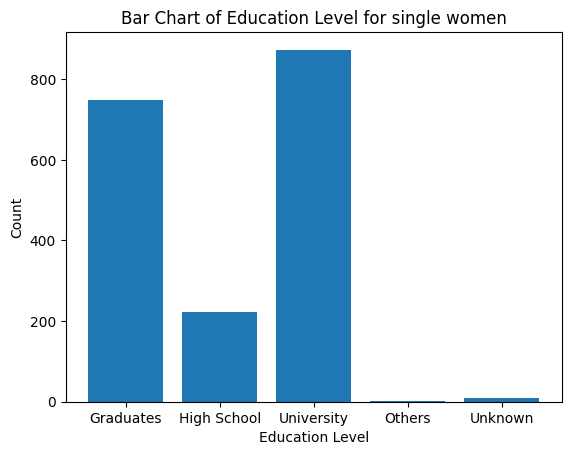

In [46]:
labels = ['Graduates', 'High School', 'University', 'Others', 'Unknown']

sizes = [aa1, aa2, bb, cc, dd]

plt.bar(labels, sizes)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Bar Chart of Education Level for single women')

plt.show()

### men 

In [47]:
filter2 = df[(df['default.payment.next.month'] == 1) & (df.SEX=='M')]
print(filter2.shape[0])

percent_M_def = (filter2.shape[0]/men.shape[0])*100
print(percent_M_def)

2873
24.16722745625841


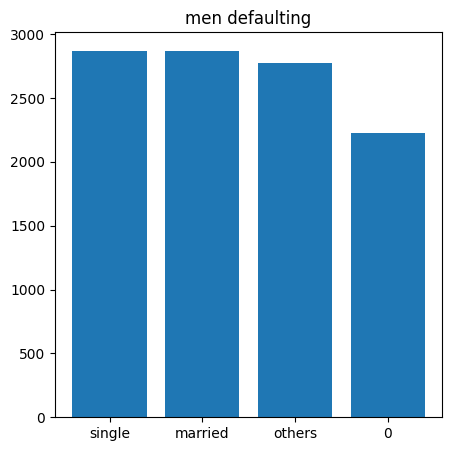

In [48]:
plt.figure(figsize=(5,5))
data = filter2['MARRIAGE']

y_pos = range(len(data))

plt.bar(data, y_pos)

plt.title('men defaulting')

plt.show()

#### married

In [49]:
mfilter2 = filter2[filter2.MARRIAGE=='married']
mfilter2.shape[0]

1346

In [50]:
mfilter2i = mfilter2[(mfilter2.EDUCATION== 1) | (mfilter2.EDUCATION== 3)]  ##they are school graduates or in high school
A = mfilter2i.shape[0]
print("school graduates or in high school: ", A)

new2 = mfilter2i[mfilter2i.EDUCATION== 1] #school graduates
A1 = new2.shape[0]
print("school graduates", new2.shape[0])

new3 = mfilter2i[mfilter2i.EDUCATION== 3] #high school
A2 = new3.shape[0] 
print("high school", new3.shape[0])
 

mfilter2ii = mfilter2[mfilter2.EDUCATION== 2]  ##they are in university
B = mfilter2ii.shape[0]
print("in university: ", B)

mfilter2iii = mfilter2[mfilter2.EDUCATION== 4]  ##others
C = mfilter2iii.shape[0]
print("others: ", C)

mfilter2iv = mfilter2[mfilter2.EDUCATION== 5]  ##unknown
D = mfilter2iv.shape[0]
print("unknown: ", D)

school graduates or in high school:  693
school graduates 390
high school 303
in university:  643
others:  2
unknown:  8


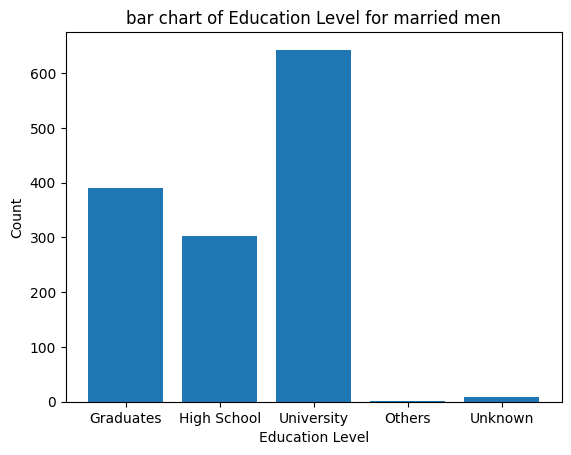

In [51]:
labels = ['Graduates', 'High School', 'University', 'Others', 'Unknown']

sizes = [A1, A2, B, C, D]

plt.bar(labels, sizes)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('bar chart of Education Level for married men')

plt.show()

#### single 

In [52]:
mfilter2a = filter2[filter2.MARRIAGE=='single']
mfilter2a.shape[0]

1485

In [53]:
mfilter2ai = mfilter2a[(mfilter2a.EDUCATION== 1) | (mfilter2a.EDUCATION== 3)]  ##they are school graduates or in high school
Aa = mfilter2ai.shape[0]
print("school graduates or in high school: ", Aa)

New2 = mfilter2ai[mfilter2ai.EDUCATION== 1] #school graduates
Aa1 = New2.shape[0]
print("school graduates", New2.shape[0])

New3 = mfilter2ai[mfilter2ai.EDUCATION== 3] #high school
Aa2 = New3.shape[0] 
print("high school", New3.shape[0])
 

mfilter2aii = mfilter2a[mfilter2a.EDUCATION== 2]  ##they are in university
Bb = mfilter2aii.shape[0]
print("in university: ", Bb)

mfilter2aiii = mfilter2a[mfilter2a.EDUCATION== 4]  ##others
Cc = mfilter2aiii.shape[0]
print("others: ", Cc)

mfilter2aiv = mfilter2a[mfilter2a.EDUCATION== 5]  ##unknown
Dd = mfilter2aiv.shape[0]
print("unknown: ", Dd)

school graduates or in high school:  735
school graduates 506
high school 229
in university:  746
others:  2
unknown:  2


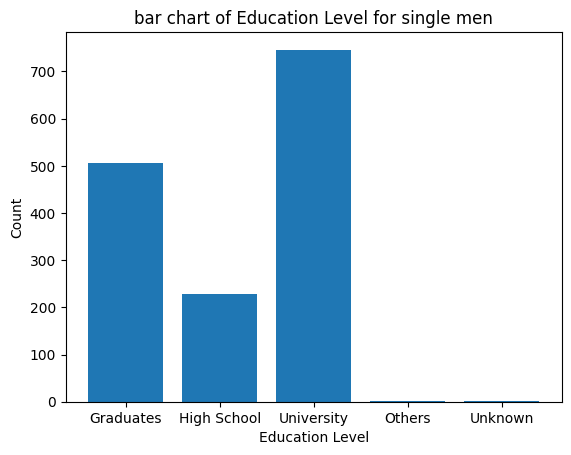

In [54]:
labels = ['Graduates', 'High School', 'University', 'Others', 'Unknown']

sizes = [Aa1, Aa2, Bb, Cc, Dd]

plt.bar(labels, sizes)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('bar chart of Education Level for single men')

plt.show()

## default based on education

In [55]:
Efilter1 = df[(df.EDUCATION== 1)]   #school grads
print(Efilter1.shape[0])

# probable school grad defaulters among men and women 
total_grad_def = a1 + aa1+ A1 + Aa1
print(total_grad_def)
percentage1 = (total_grad_def/Efilter1.shape[0])*100
print(percentage1)


10585
2023
19.11195087387813


In [56]:
Efilter2 = df[(df.EDUCATION== 2)]     #universiy
print(Efilter2.shape[0])  

total_uni_def = b+bb+B+Bb
print(total_uni_def)
percentage2 = (total_uni_def/Efilter2.shape[0])*100
print(percentage2)

14030
3285
23.414112615823235


In [57]:
Efilter3 = df[(df.EDUCATION== 3)]                 #high school
print(Efilter3.shape[0])

total_hschool_def = a2 + aa2+ A2 + Aa2
print(total_hschool_def)
percentage3 = (total_hschool_def/Efilter3.shape[0])*100
print(percentage3)

4917
1206
24.527150701647347


In [58]:
Efilter4 = df[(df.EDUCATION== 4)]
print(Efilter4.shape[0])

total_other_def = c + cc + C + Cc
print(total_other_def)
percentage4 = (total_other_def/Efilter4.shape[0])*100
print(percentage4)


123
7
5.691056910569105


In [59]:
Efilter5 = df[(df.EDUCATION== 5)]
print(Efilter5.shape[0])

total_unknwn_def = d + dd + D + Dd
print(total_unknwn_def)
percentage5 = (total_unknwn_def/Efilter5.shape[0])*100
print(percentage5)


331
26
7.854984894259818


## DATA TRANSFORMATION

In [63]:
long_df = df.melt(id_vars=['REPAY_APR','REPAY_MAY','REPAY_JUN','REPAY_JUL','REPAY_AUG','REPAY_SEPT'], value_vars=['default.payment.next.month'], var_name= 'metric', value_name='prob')
print(long_df)


       REPAY_APR  REPAY_MAY  REPAY_JUN  REPAY_JUL  REPAY_AUG  REPAY_SEPT  \
0             -2         -2         -1         -1          2           2   
1              2          0          0          0          2          -1   
2              0          0          0          0          0           0   
3              0          0          0          0          0           0   
4              0          0          0         -1          0          -1   
...          ...        ...        ...        ...        ...         ...   
29995          0          0          0          0          0           0   
29996          0          0         -1         -1         -1          -1   
29997          0          0         -1          2          3           4   
29998         -1          0          0          0         -1           1   
29999          0          0          0          0          0           0   

                           metric  prob  
0      default.payment.next.month     1  
1  

In [79]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JUL,REPAY_JUN,...,BILL_APR,PAID_SEPT,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,default.payment.next.month,Column_Sum,Repay_mean
0,1,20000.0,F,2,married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,-0.333333
1,2,120000.0,F,2,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,0.500000
2,3,90000.0,F,2,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.000000
3,4,50000.0,F,2,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0.000000
4,5,50000.0,M,2,married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,3,married,39,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0.000000
29996,29997,150000.0,M,3,single,43,-1,-1,-1,-1,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-4,-0.666667
29997,29998,30000.0,M,2,single,37,4,3,2,-1,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,8,1.333333
29998,29999,80000.0,M,3,married,41,1,-1,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-1,-0.166667


In [80]:
long_df1 = df.melt(id_vars=['BILL_APR','BILL_MAY','BILL_JUN','BILL_JUL','BILL_AUG','BILL_SEPT'], value_vars=['default.payment.next.month'], var_name= 'metric', value_name='prob')
print(long_df1)

       BILL_APR  BILL_MAY  BILL_JUN  BILL_JUL  BILL_AUG  BILL_SEPT  \
0           0.0       0.0       0.0     689.0    3102.0     3913.0   
1        3261.0    3455.0    3272.0    2682.0    1725.0     2682.0   
2       15549.0   14948.0   14331.0   13559.0   14027.0    29239.0   
3       29547.0   28959.0   28314.0   49291.0   48233.0    46990.0   
4       19131.0   19146.0   20940.0   35835.0    5670.0     8617.0   
...         ...       ...       ...       ...       ...        ...   
29995   15980.0   31237.0   88004.0  208365.0  192815.0   188948.0   
29996       0.0    5190.0    8979.0    3502.0    1828.0     1683.0   
29997   19357.0   20582.0   20878.0    2758.0    3356.0     3565.0   
29998   48944.0   11855.0   52774.0   76304.0   78379.0    -1645.0   
29999   15313.0   32428.0   36535.0   49764.0   48905.0    47929.0   

                           metric  prob  
0      default.payment.next.month     1  
1      default.payment.next.month     1  
2      default.payment.next.month

In [81]:
long_df2 = df.melt(id_vars=['PAID_APR','PAID_MAY','PAID_JUN','PAID_JUL','PAID_AUG','PAID_SEPT'], value_vars=['default.payment.next.month'], var_name= 'metric', value_name='prob')
print(long_df2)

       PAID_APR  PAID_MAY  PAID_JUN  PAID_JUL  PAID_AUG  PAID_SEPT  \
0           0.0       0.0       0.0       0.0     689.0        0.0   
1        2000.0       0.0    1000.0    1000.0    1000.0        0.0   
2        5000.0    1000.0    1000.0    1000.0    1500.0     1518.0   
3        1000.0    1069.0    1100.0    1200.0    2019.0     2000.0   
4         679.0     689.0    9000.0   10000.0   36681.0     2000.0   
...         ...       ...       ...       ...       ...        ...   
29995    1000.0    5000.0    3047.0    5003.0   20000.0     8500.0   
29996       0.0       0.0     129.0    8998.0    3526.0     1837.0   
29997    3100.0    2000.0    4200.0   22000.0       0.0        0.0   
29998    1804.0   52964.0    1926.0    1178.0    3409.0    85900.0   
29999    1000.0    1000.0    1000.0    1430.0    1800.0     2078.0   

                           metric  prob  
0      default.payment.next.month     1  
1      default.payment.next.month     1  
2      default.payment.next.month

### creating subplot 

<Axes: xlabel='prob', ylabel='REPAY_SEPT'>

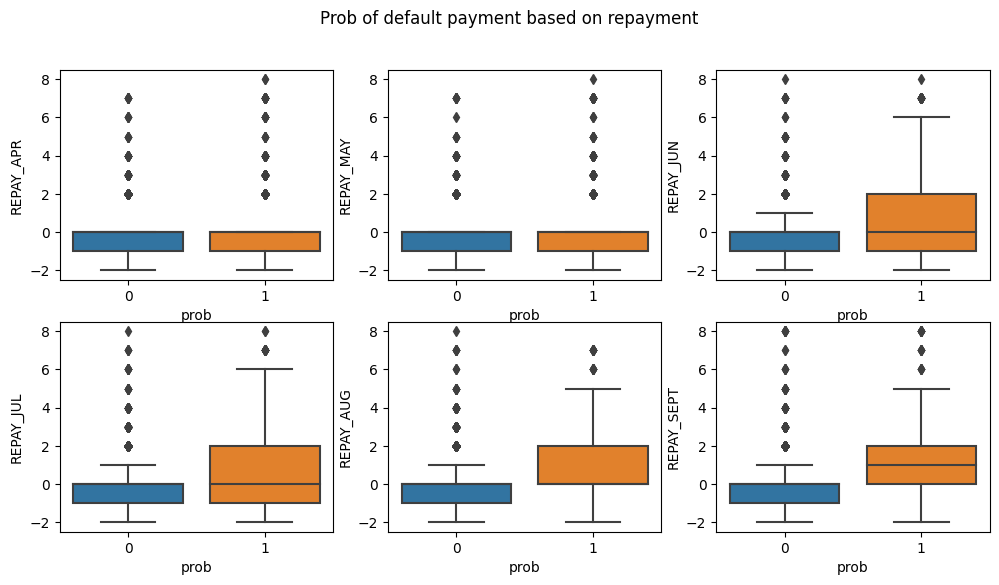

In [82]:
fig, axes = plt.subplots(2,3, figsize=(12,6))

fig.suptitle('Prob of default payment based on repayment')

sns.boxplot(y ='REPAY_APR', x = 'prob', data = long_df, ax =axes[0,0])
sns.boxplot(y ='REPAY_MAY', x = 'prob', data = long_df, ax = axes[0,1])
sns.boxplot(y ='REPAY_JUN', x = 'prob', data = long_df, ax = axes[0,2])
sns.boxplot(y ='REPAY_JUL', x = 'prob', data = long_df, ax = axes[1,0])
sns.boxplot(y ='REPAY_AUG', x = 'prob', data = long_df, ax=axes[1,1])
sns.boxplot(y ='REPAY_SEPT', x = 'prob', data = long_df, ax=axes[1,2])


<Axes: xlabel='prob', ylabel='BILL_SEPT'>

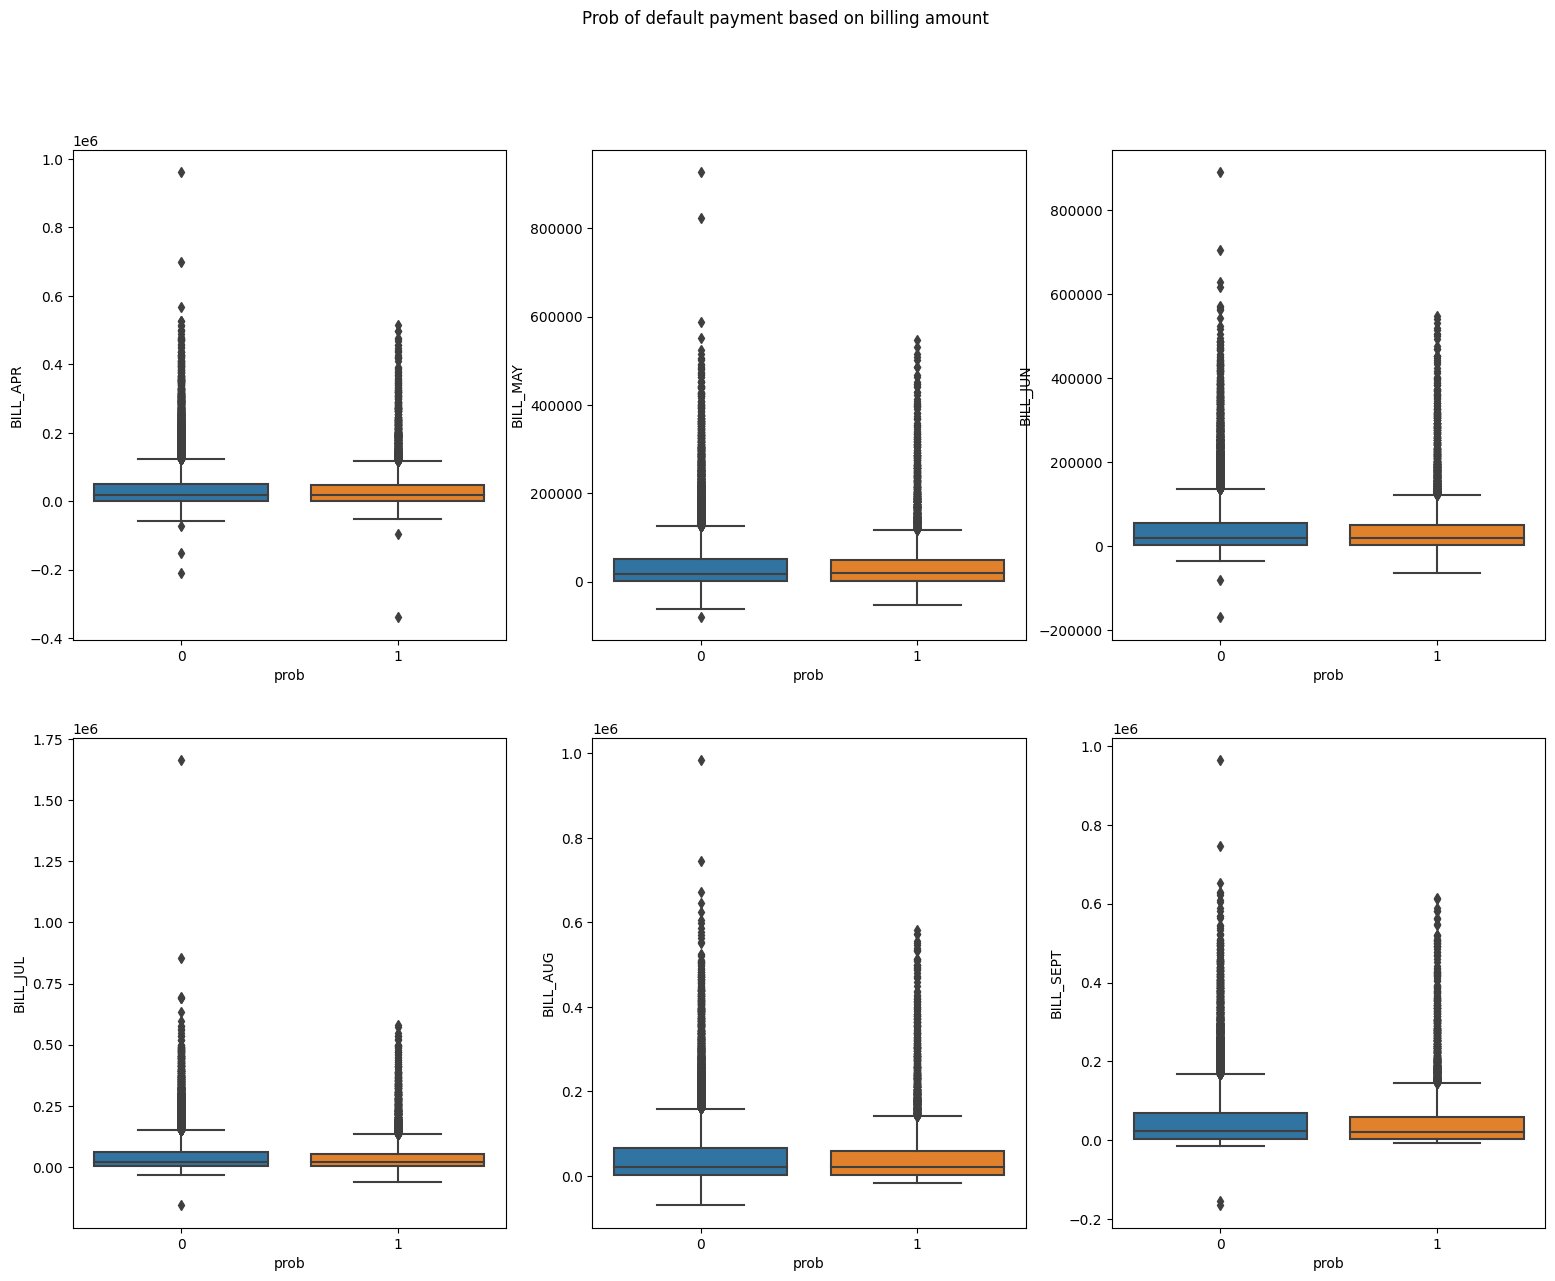

In [91]:
fig, axes = plt.subplots(2,3, figsize=(19,14))

fig.suptitle('Prob of default payment based on billing amount')

sns.boxplot(y ='BILL_APR', x = 'prob', data = long_df1, ax =axes[0,0])
sns.boxplot(y ='BILL_MAY', x = 'prob', data = long_df1, ax = axes[0,1])
sns.boxplot(y ='BILL_JUN', x = 'prob', data = long_df1, ax = axes[0,2])
sns.boxplot(y ='BILL_JUL', x = 'prob', data = long_df1, ax = axes[1,0])
sns.boxplot(y ='BILL_AUG', x = 'prob', data = long_df1, ax=axes[1,1])
sns.boxplot(y ='BILL_SEPT', x = 'prob', data = long_df1, ax=axes[1,2])


<Axes: xlabel='prob', ylabel='PAID_SEPT'>

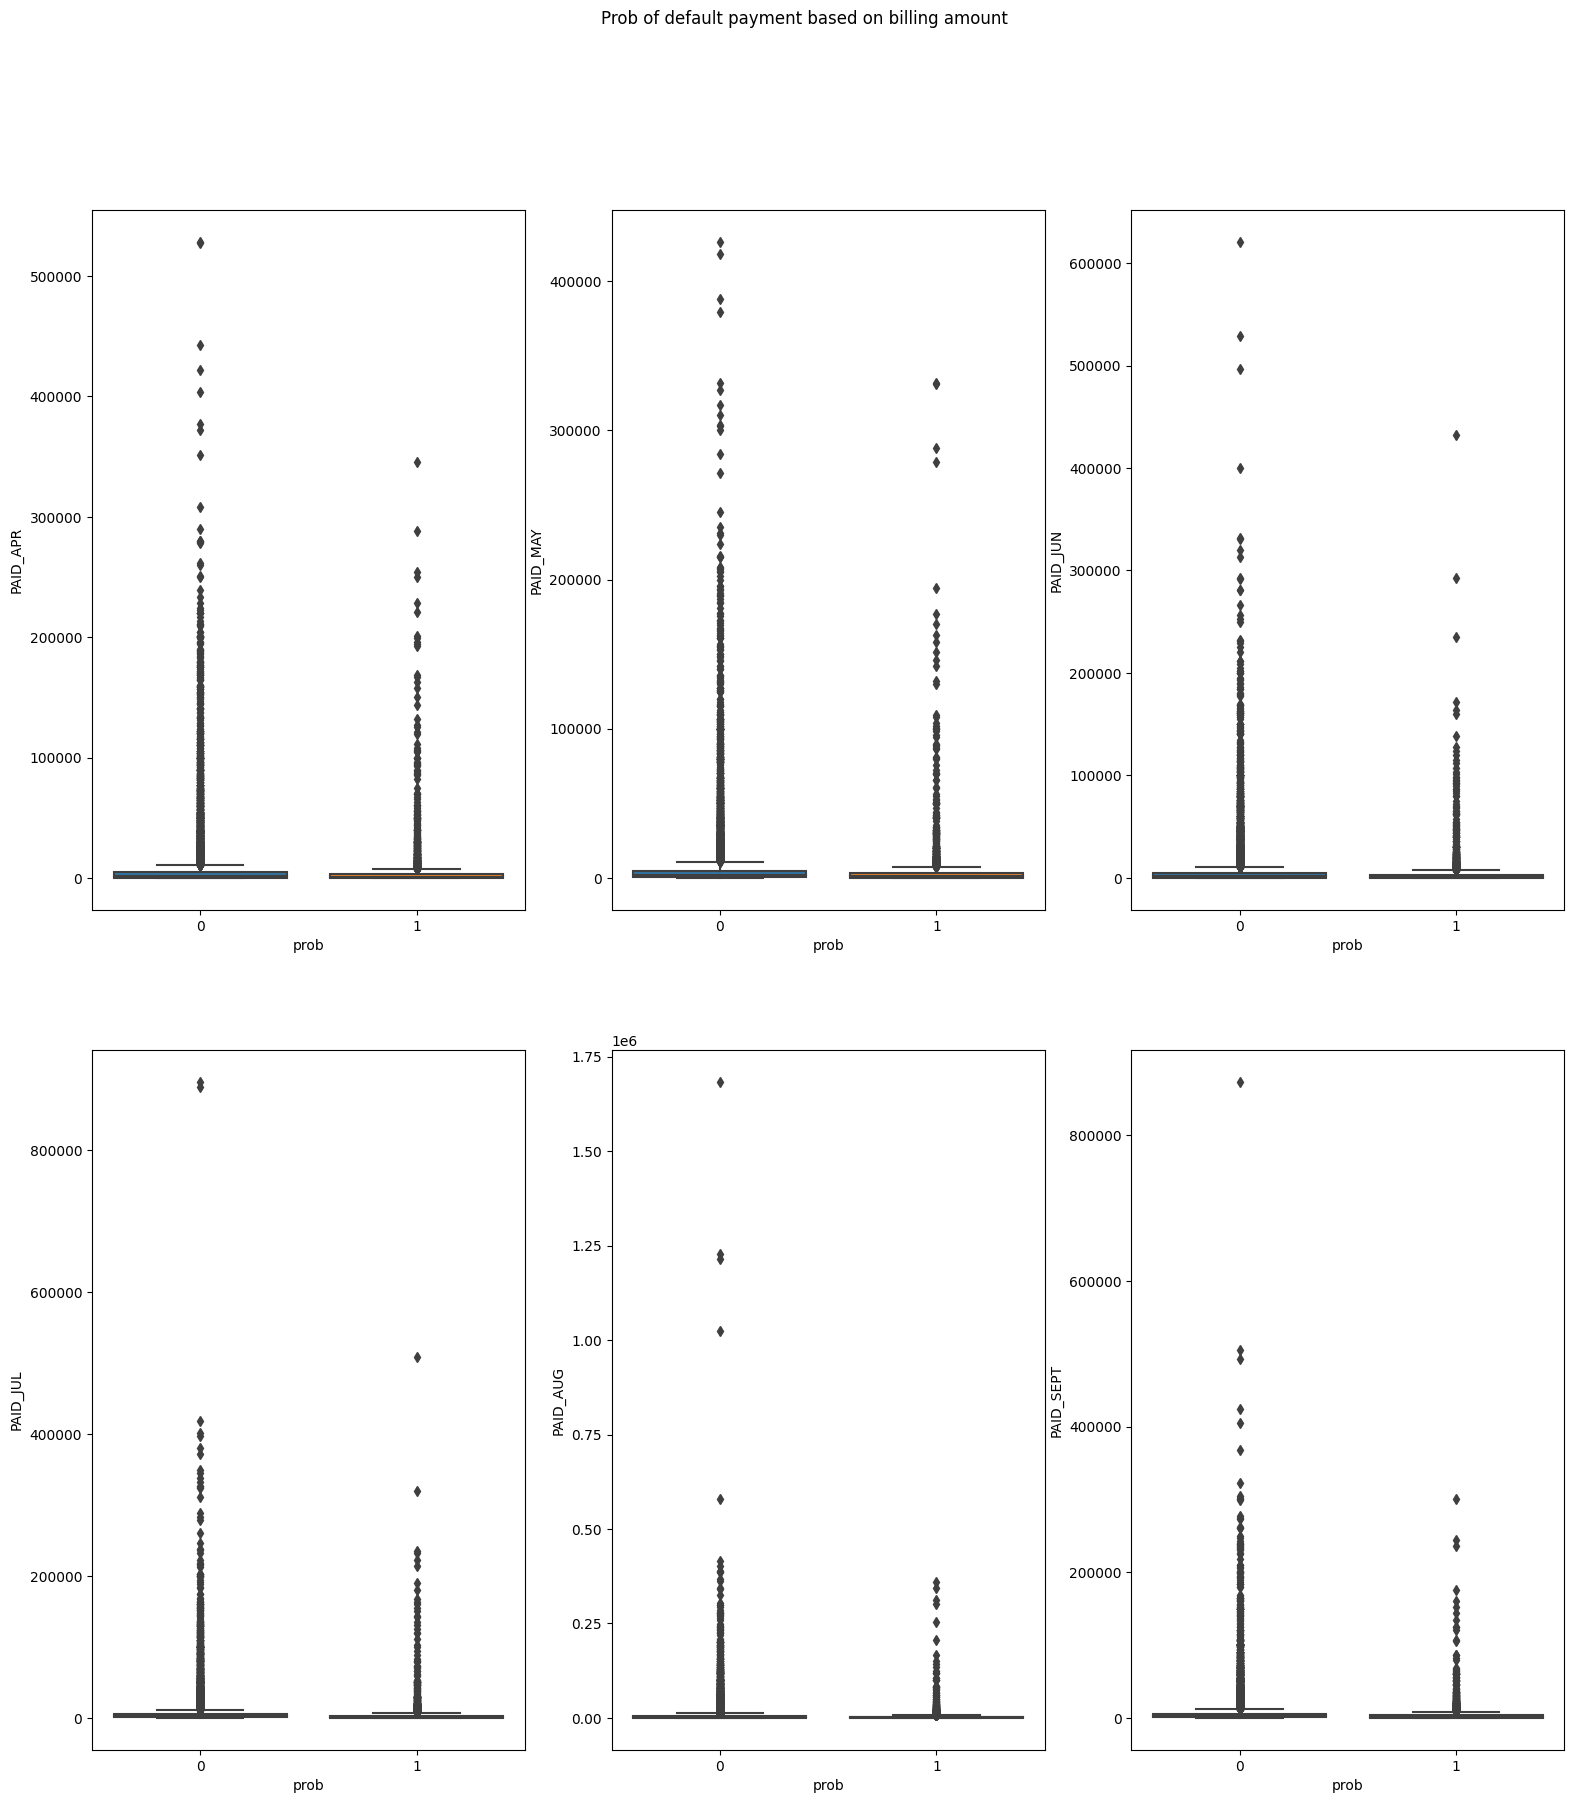

In [96]:
fig, axes = plt.subplots(2,3, figsize=(19,20))

fig.suptitle('Prob of default payment based on billing amount')

sns.boxplot(y ='PAID_APR', x = 'prob', data = long_df2, ax =axes[0,0])
sns.boxplot(y ='PAID_MAY', x = 'prob', data = long_df2, ax = axes[0,1])
sns.boxplot(y ='PAID_JUN', x = 'prob', data = long_df2, ax = axes[0,2])
sns.boxplot(y ='PAID_JUL', x = 'prob', data = long_df2, ax = axes[1,0])
sns.boxplot(y ='PAID_AUG', x = 'prob', data = long_df2, ax=axes[1,1])
sns.boxplot(y ='PAID_SEPT', x = 'prob', data = long_df2, ax=axes[1,2])